In [1]:
import sklearn as sk
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import NonUniformImage
import numpy as np
from os.path import exists
from sklearn.decomposition import PCA 
import scipy.stats as stats
#import aplpy as ap
import unittest
import warnings
import seaborn as sns



data = np.genfromtxt('Master_AllSurveyed_anconsta.dat', delimiter='	')

# Switch numbers to -999 if there is a NAN
# data[np.isnan(data)] = -999

#make sure the shape still remains the same in terms of data
print(data.shape)
print(data.dtype)

# CHECK FOR NAN VALUES

#check complete, false indicated no NAN values in the numpy array
array_sum = np.all(data)
array_has_nan = np.isnan(array_sum)

print(array_has_nan)

# column(param 1) vs other params


paramOne = data[:,1] #check condition of fake values 
paramTwo = data[:,2]
paramThree = (data[:,3])
paramFour = data[:,4]
paramFive = data[:,5]
paramSix = data[:,6]
paramSeven = data[:,7]
paramEight = data[:,8]
paramNine = data[:,9]
paramTen = data[:,10]
paramElevlen = data[:,11]
paramTwelve = data[:,12]
paramThirteen = data[:,13]
paramFourteen = data[:,14]
paramFifteen = data[:,15]
paramSixteen = data[:,16]
paramSeventeen = data[:,17]
paramEighteen = data[:,18]
paramNineteen = data[:,19]
paramTwenety = data[:,20]
paramTwentyOne = data[:,21]
paramTwentyTwo = data[:,22] #D4000
paramTwentyFour = data[:,23] #Class
paramTwentyFive = data[:,24] #MaserLum

#Take out -999 (fake values) when doing firs step of data analysis


#First step of PCA, standarize the data
firstParamZ =stats.zscore(paramOne)
secondParamZ = stats.zscore(paramTwo)
thirdParamZ = stats.zscore(paramThree, nan_policy='omit')
fourParamZ = stats.zscore(paramFour ,nan_policy='omit')
fifthParamZ = stats.zscore(paramFive,nan_policy='omit')
sixthParamz = stats.zscore(paramSix,nan_policy='omit')
sevenParamz = stats.zscore(paramSeven,nan_policy='omit')

cov_mat = np.stack((firstParamZ, secondParamZ) ,axis= 0).T
stack23 = np.stack((secondParamZ, thirdParamZ),axis =0).T


# firstcov =np.cov(firstParamZ, secondParamZ)
# secondcov = np.cov(secondParamZ, thirdParamZ)
# Vdispcov = np.cov(thirdParamZ)
# vdiscov1 = secondParamZ.cov(thirdParamZ)
# print(firstcov)
# np.cov

firstParamZ = pd.Series(firstParamZ)
secondParamZ = pd.Series(secondParamZ)
thirdParamZ = pd.Series(thirdParamZ)
cov1 = firstParamZ.cov(secondParamZ)
cov2 = secondParamZ.cov(thirdParamZ)



#Find outlier and use "omit" flag to omit from data calculation 
#Masers with grey (n > 1 for param 23 ), and different color for non-masers 
#magenta 



(1422, 25)
float64
False


Text(0.5, 1.0, 'Raw data of param 1(z) vs param 2(y)')

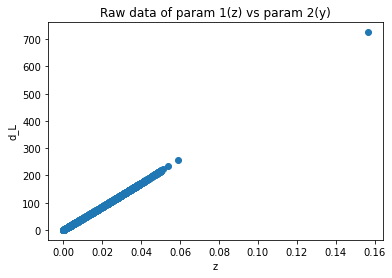

In [12]:
plt.scatter(paramOne,paramTwo)
plt.xlabel("z")
plt.ylabel("d_L")
plt.title("Raw data of param 1(z) vs param 2(y)")



(-5.0, 30.0)

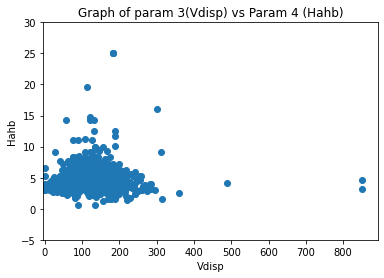

In [64]:
plt.scatter(paramThree,paramFour)
plt.title("Graph of param 3(Vdisp) vs Param 4 (Hahb)")
plt.xlabel("Vdisp")
plt.ylabel("Hahb")
plt.xlim(-5)
plt.ylim(-5, 30)


Text(0, 0.5, 'LogLHaObs')

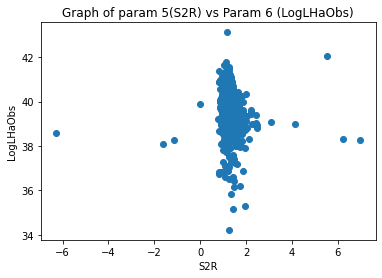

In [41]:
plt.scatter(paramFive,paramSix)
plt.title("Graph of param 5(S2R) vs Param 6 (LogLHaObs)")
plt.xlabel("S2R")
plt.ylabel("LogLHaObs")

Text(0, 0.5, 'SFRObs')

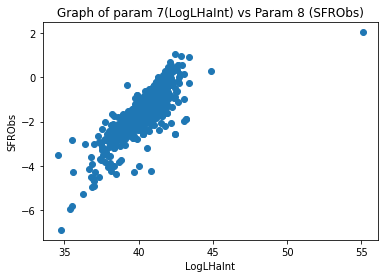

In [42]:
plt.scatter(paramSeven,paramEight)
plt.title("Graph of param 7(LogLHaInt) vs Param 8 (SFRObs)")
plt.xlabel("LogLHaInt")
plt.ylabel("SFRObs")

Text(0, 0.5, 'LogLO3Obs')

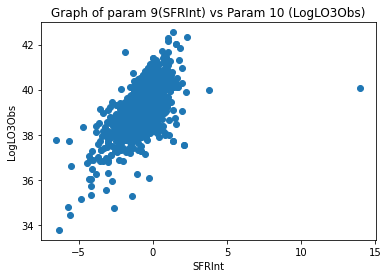

In [43]:
plt.scatter(paramNine,paramTen)
plt.title("Graph of param 9(SFRInt) vs Param 10 (LogLO3Obs)")
plt.xlabel("SFRInt")
plt.ylabel("LogLO3Obs")

Text(0, 0.5, 'LogLO1Obs')

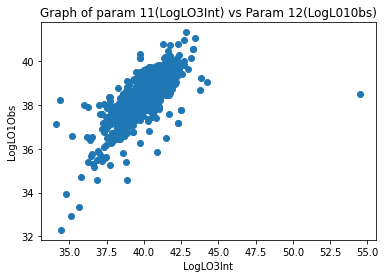

In [44]:
plt.scatter(paramElevlen,paramTwelve)

plt.xlabel("LogLO3Int")
plt.ylabel("LogLO1Obs")

Text(0, 0.5, 'EddRatObs')

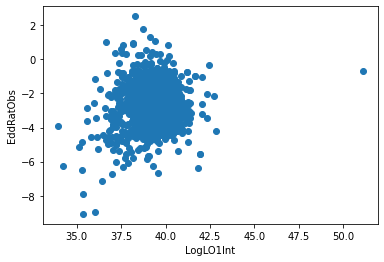

In [65]:
plt.scatter(paramThirteen,paramFourteen)
# plt.title("Graph of param 13(LogLO1Int) vs Param 14(EddRatObs)")
plt.xlabel("LogLO1Int")
plt.ylabel("EddRatObs")

Text(0, 0.5, 'LogO3toHb')

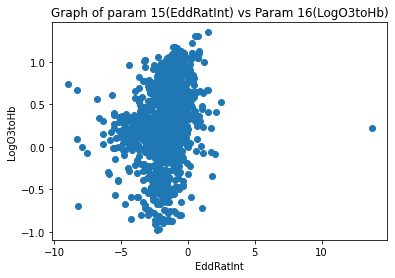

In [46]:
plt.scatter(paramFifteen,paramSixteen)
plt.title("Graph of param 15(EddRatInt) vs Param 16(LogO3toHb)")
plt.xlabel("EddRatInt")
plt.ylabel("LogO3toHb")

Text(0, 0.5, 'LogS2toHa')

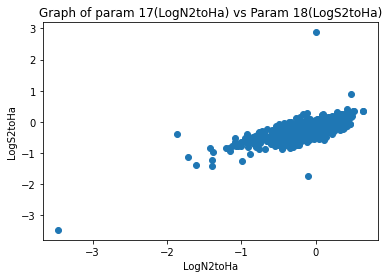

In [47]:
plt.scatter(paramSeventeen,paramEighteen)
plt.title("Graph of param 17(LogN2toHa) vs Param 18(LogS2toHa)")
plt.xlabel("LogN2toHa")
plt.ylabel("")

Text(0, 0.5, 'LogLO1Obs')

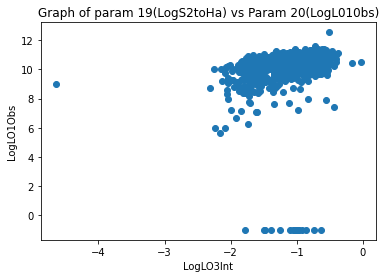

In [48]:
plt.scatter(paramNineteen,paramTwenety)
plt.title("Graph of param 19(LogS2toHa) vs Param 20(LogL010bs)")
plt.xlabel("LogLO3Int")
plt.ylabel("LogLO1Obs")

Text(0, 0.5, 'LogLO1Obs')

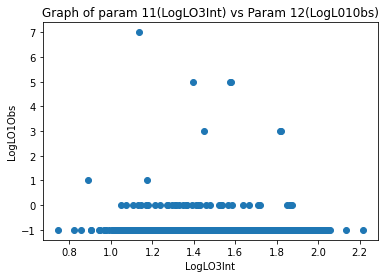

In [49]:
plt.scatter(paramTwentyOne,paramTwentyFour)
plt.title("Graph of param 11(LogLO3Int) vs Param 12(LogL010bs)")
plt.xlabel("LogLO3Int")
plt.ylabel("LogLO1Obs")

Text(0, 0.5, 'LogLO1Obs')

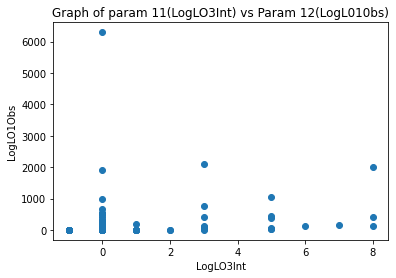

In [50]:
plt.scatter(paramTwentyFour,paramTwentyFive)
plt.title("Graph of param 11(LogLO3Int) vs Param 12(LogL010bs)")
plt.xlabel("LogLO3Int")
plt.ylabel("LogLO1Obs")

In [51]:
# BELOW WILL BE THE INDIVIDUAL RAW DATA COMPARISON WITH OTHER PARAMTERS

Text(0, 0.5, 'LogLO1Obs')

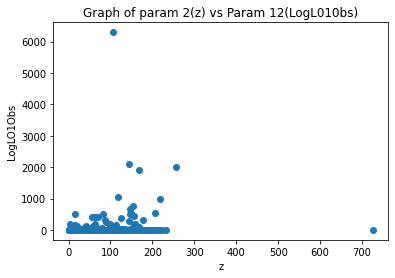

In [56]:
plt.scatter(paramTwo,paramTwentyFive)
plt.title("Graph of param 2(z) vs Param 12(LogL010bs)")
plt.xlabel("z")
plt.ylabel("LogLO1Obs")

Text(0, 0.5, 'LogLO1Obs')

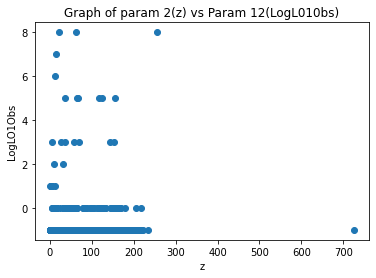

In [57]:
plt.scatter(paramTwo,paramTwentyFour)
plt.title("Graph of param 2(z) vs Param 12(LogL010bs)")
plt.xlabel("z")
plt.ylabel("LogLO1Obs")


Text(0, 0.5, 'LogLO1Obs')

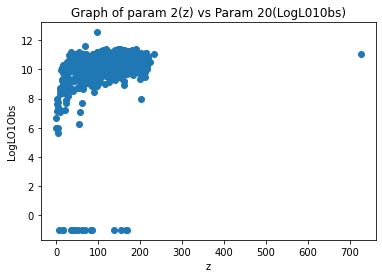

In [53]:
plt.scatter(paramTwo,paramTwenety)
plt.title("Graph of param 2(z) vs Param 20(LogL010bs)")
plt.xlabel("z")
plt.ylabel("LogLO1Obs")

Text(0, 0.5, 'z')

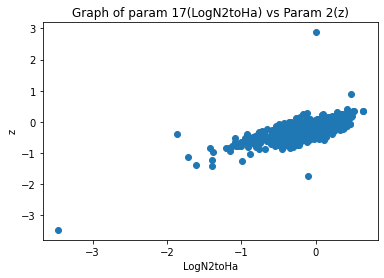

In [52]:
plt.scatter(paramSeventeen,paramEighteen)
plt.title("Graph of param 17(LogN2toHa) vs Param 2(z)")
plt.xlabel("LogN2toHa")
plt.ylabel("z")

In [5]:
#GET rid of outliers 

mean = np.mean(paramOne)
standard_deviation = np.std(paramOne)
distance_from_mean = abs(paramOne - mean)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliersParamOne = paramOne[not_outlier]

#Parameter 2 outlier 

mean2 = np.mean(paramTwo)
standard_deviation = np.std(paramTwo)
distance_from_mean = abs(paramTwo - mean2)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliersParamTwo = paramTwo[not_outlier]


mean1 = np.nanmean(paramThree)
standard_deviation = np.nanstd(paramThree)
distance_from_mean = abs(paramThree - mean1)
max_deviations = 3
not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliersParamThree = paramThree[not_outlier]



print(no_outliersParamThree)
print(no_outliersParamOne)
print(no_outliersParamTwo)

# mean = np.mean(paramOne)
# standard_deviation = np.std(paramOne)
# distance_from_mean = abs(paramOne - mean)
# max_deviations = 3
# not_outlier = distance_from_mean < max_deviations * standard_deviation
no_outliersParamOne = paramOne[not_outlier]




    

[170.5     66.7     70.0343 ... 100.     114.     154.7   ]
[0.00351  0.00769  0.021322 ... 0.025084 0.007927 0.020407]
[ 14.69668  32.25243  90.272   ... 106.4844   33.26382  86.36165]


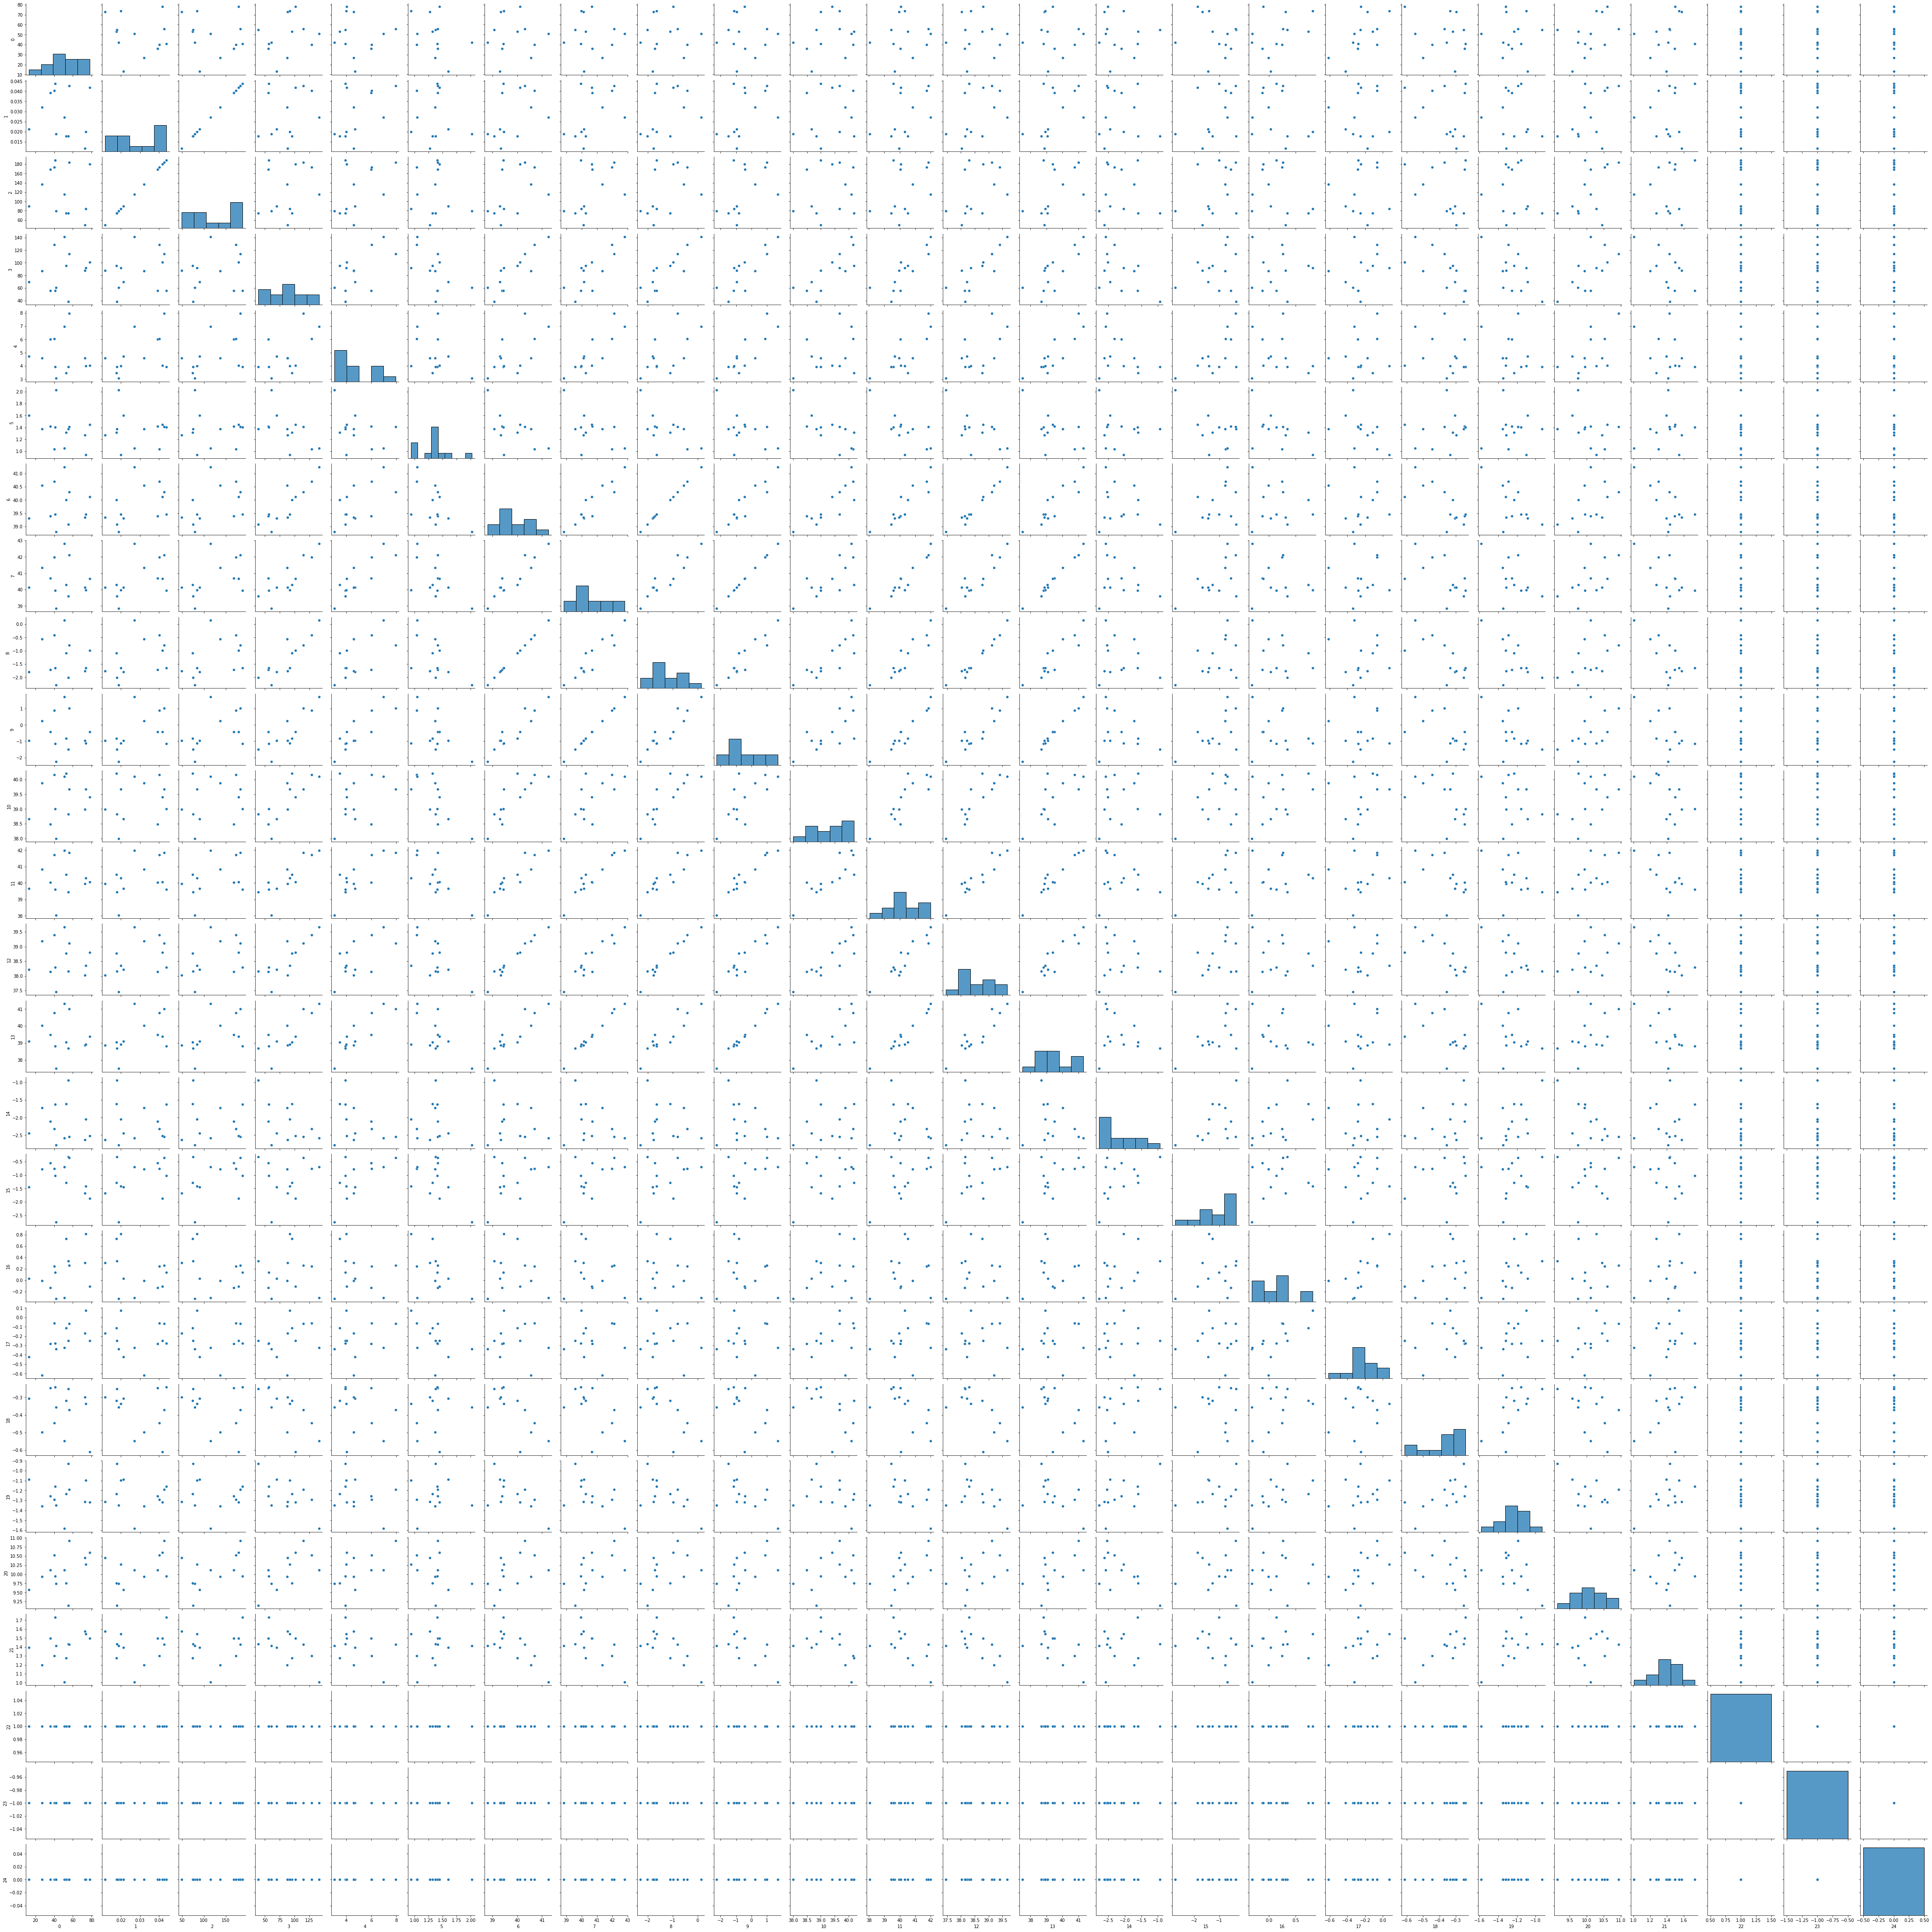

In [8]:
#ALL PARAM VALUES AGAINST EACH OTHER, first 3 values for test



# Updated = [[paramOne],[paramTwo],paramThree,paramFour,paramFive,paramSix,paramSeven,paramEight,paramNine,paramTen,
# paramElevlen,paramTwelve,paramThirteen,paramFourteen,paramFifteen,paramSixteen,paramSeventeen,paramEighteen,
# paramNineteen,paramTwenety,paramTwentyOne,paramTwenety,paramTwentyOne,paramTwentyTwo,paramTwentyFive]

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

updat1 = np.array([no_outliersParamOne,no_outliersParamTwo,no_outliersParamThree])

MaserCompare = data[3:15]
MaserCompare = pd.DataFrame(data[2:15])
hold = [no_outliersParamOne,no_outliersParamTwo,no_outliersParamThree]

updat1=updat1.transpose

CompareGraph = pd.DataFrame(hold)
# updat1[(np.abs(stats.zscore(updat1)) < 3).all(axis=1)]
# CompareGraph = pd.DataFrame(updat1, columns= ['z'])



sns.pairplot(MaserCompare)






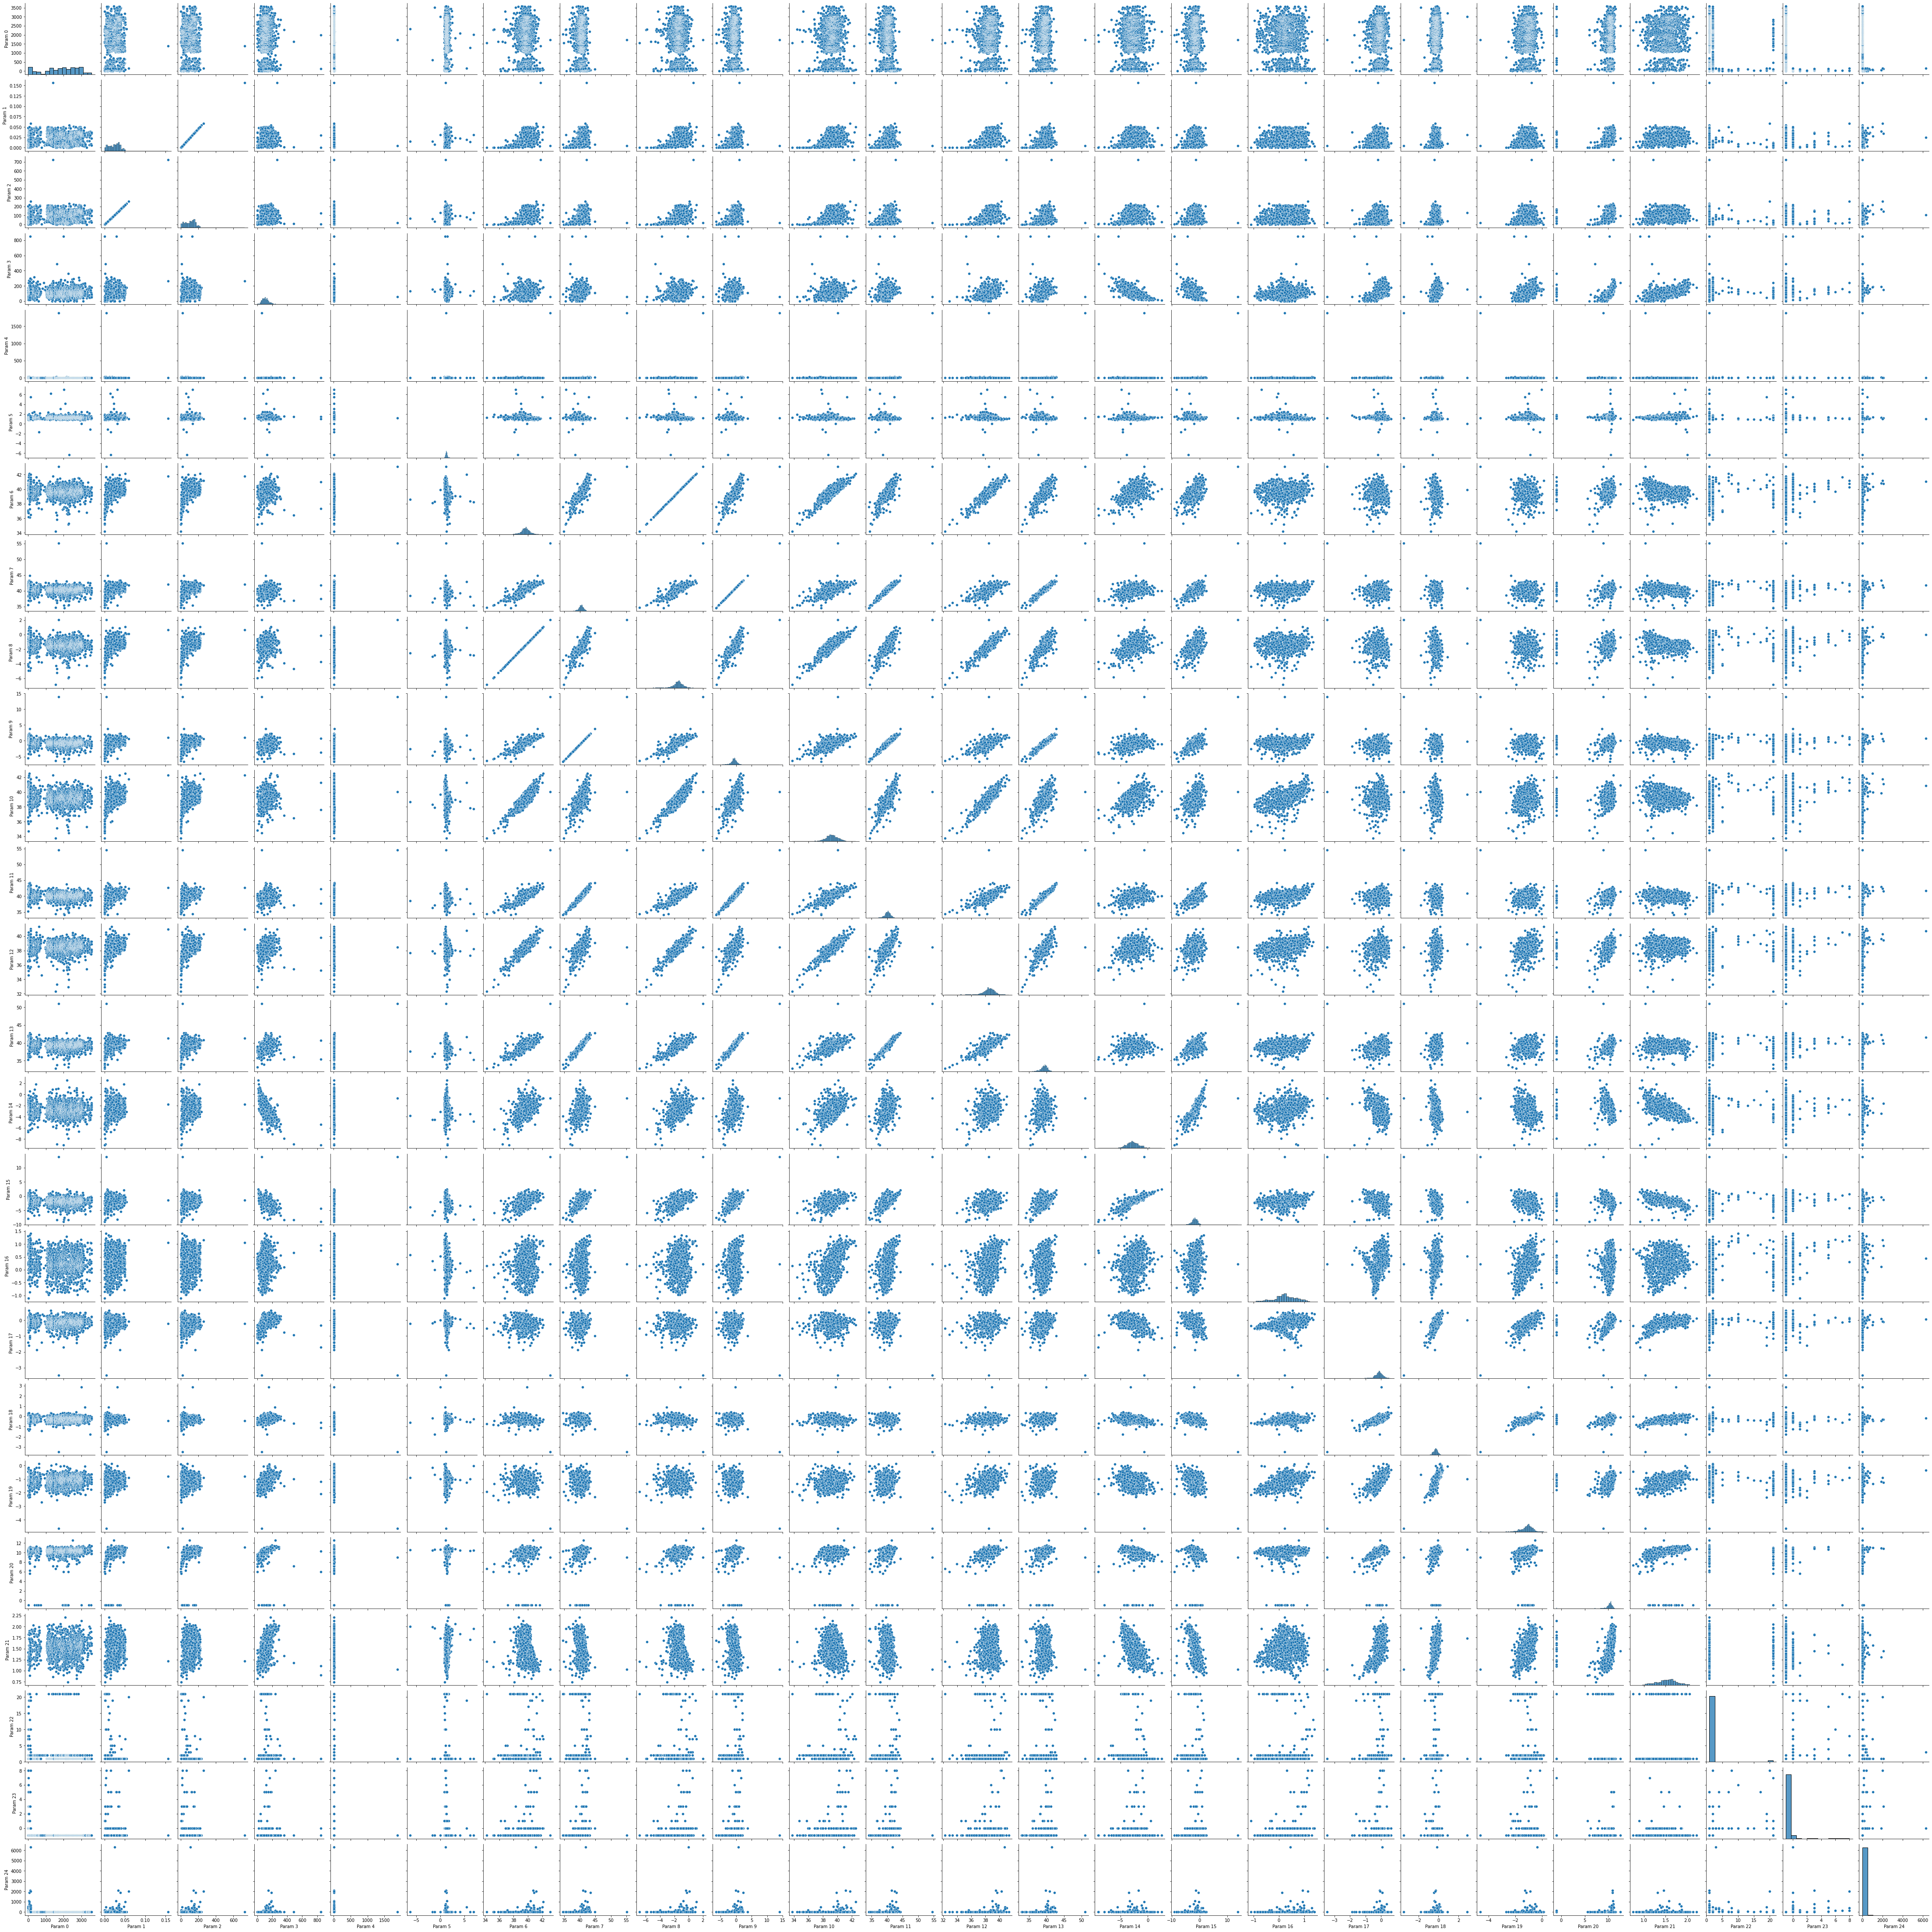

In [5]:
Maser = data[:,23]
holdReg = []
for value in Maser:
    if(value == -1):
        holdReg.append(value)

# Updated = [[paramOne],[paramTwo],[[paramThree],paramFour,paramFive,paramSix,paramSeven,paramEight,paramNine,paramTen,
# paramElevlen,paramTwelve,paramThirteen,paramFourteen,paramFifteen,paramSixteen,paramSeventeen,paramEighteen,
# paramNineteen,paramTwenety,paramTwentyOne,paramTwenety,paramTwentyOne,paramTwentyTwo,paramTwentyFive]


df = pd.DataFrame(data, columns = ['Param 0','Param 1','Param 2','Param 3','Param 4','Param 5','Param 6','Param 7','Param 8','Param 9','Param 10','Param 11','Param 12','Param 13',
'Param 14','Param 15','Param 16','Param 17','Param 18','Param 19','Param 20','Param 21','Param 22','Param 23','Param 24'])


sns.pairplot(df)


